# Visualize results

In [78]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Prepare data

In [79]:
df_subset = pd.read_pickle(f"data/_results_df_subset.pkl")


df_subset['cw_mse_std'] = df_subset['mse_per_channel_list'].apply(np.std)
df_subset['cw_mae_std'] = df_subset['mae_per_channel_list'].apply(np.std)
df_subset['cw_mse_train_std'] = df_subset['mse_train_per_channel_list'].apply(np.std)
df_subset['cw_mae_train_std'] = df_subset['mae_train_per_channel_list'].apply(np.std)

df_subset['cw_mse_std'] = df_subset['mse_per_channel_list'].apply(lambda x: np.std(x, ddof=1))
df_subset['cw_mae_std'] = df_subset['mae_per_channel_list'].apply(lambda x: np.std(x, ddof=1))
df_subset['cw_mse_train_std'] = df_subset['mse_train_per_channel_list'].apply(lambda x: np.std(x, ddof=1))
df_subset['cw_mae_train_std'] = df_subset['mae_train_per_channel_list'].apply(lambda x: np.std(x, ddof=1))

df_subset['cw_mse_std_mean_quot'] = df_subset['cw_mse_std'] / df_subset['mse']

/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/miniconda3/envs/PatchTST/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/miniconda3/envs/PatchTST/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [80]:
df_avg = pd.DataFrame()

def avg_seeds(df_avg=df_avg, data_path="national_illness", model="Linear_final", df_subset=df_subset):
    list_channel_handling = df_subset['channel_handling'].unique().tolist()

    df_subset = df_subset[
        (df_subset['model'] == model) &
        (df_subset['data_path'] == data_path)

        #(df_subset['data_path'].str.contains(data_path)) &
        #(~df_subset['data_path'].str.contains("lag"))
    ].copy()
        
    for channel_handling in list_channel_handling:
        
        df_seed_channel = df_subset[df_subset['channel_handling'] == channel_handling]
        if df_seed_channel.empty:
            continue

        list_cd_weight_decay = df_seed_channel['cd_weight_decay'].unique().tolist()
        list_cd_pred_len = df_seed_channel['pred_len'].unique().tolist()

        list_cd_pred_len = list_cd_pred_len + ["Avg"]
        
        for cd_weight_decay in list_cd_weight_decay:
            for pred_len in list_cd_pred_len:
                if pred_len == "Avg":
                    df_seed_channel_cd = df_seed_channel[(df_seed_channel['cd_weight_decay'] == cd_weight_decay)].copy()
                else:
                    df_seed_channel_cd = df_seed_channel[(df_seed_channel['cd_weight_decay'] == cd_weight_decay) &
                                                        (df_seed_channel['pred_len'] == pred_len)
                                                        ].copy()
                if df_seed_channel_cd.empty:
                    continue

                avg_row = {
                    'model': model,
                    'data_path': data_path,
                    'pred_len': pred_len,
                    'random_seed': "Avg",

                    'mse_mean': df_seed_channel_cd['mse'].mean(),
                    'mse_std': df_seed_channel_cd['mse'].std(),
                    'mae_mean': df_seed_channel_cd['mae'].mean(),
                    'mae_std': df_seed_channel_cd['mae'].std(),

                    'mse_train_mean': df_seed_channel_cd['mse_train'].mean(),
                    'mse_train_std': df_seed_channel_cd['mse_train'].std(),
                    'mae_train_mean': df_seed_channel_cd['mae_train'].mean(),
                    'mae_train_std': df_seed_channel_cd['mae_train'].std(),

                    'cw_mse_std_mean': df_seed_channel_cd['cw_mse_std'].mean(),
                    'cw_mse_std_std': df_seed_channel_cd['cw_mse_std'].std(),
                    'cw_mae_std_mean': df_seed_channel_cd['cw_mae_std'].mean(),
                    'cw_mae_std_std': df_seed_channel_cd['cw_mae_std'].std(),

                    'cw_mse_std_mean_quot_MEAN': df_seed_channel_cd['cw_mse_std_mean_quot'].mean(),
                    'cw_mse_std_mean_quot_STD': df_seed_channel_cd['cw_mse_std_mean_quot'].std(),

                    'cw_mse_train_std_mean': df_seed_channel_cd['cw_mse_train_std'].mean(),
                    'cw_mse_train_std_std': df_seed_channel_cd['cw_mse_train_std'].std(),
                    'cw_mae_train_std_mean': df_seed_channel_cd['cw_mae_train_std'].mean(),
                    'cw_mae_train_std_std': df_seed_channel_cd['cw_mae_train_std'].std(),

                    'model_CH': model + " ("+ channel_handling+ ")",
                    'cd_weight_decay': cd_weight_decay,
                    'channel_handling': channel_handling,
                    'delta_factor': df_seed_channel_cd['delta_factor'].unique().tolist(),
                    'skip_1st_epoch': df_seed_channel_cd['skip_1st_epoch'].unique().tolist(),
                    'Avg_values_RanS': df_seed_channel_cd['random_seed'].tolist(), 
                    'Avg_Count_RanS': len(df_seed_channel_cd), 
                }
                
                avg_row['mse_per_channel_list_means'] = [np.mean(x) for x in zip(*df_seed_channel_cd['mse_per_channel_list'].tolist())]
                avg_row['mae_per_channel_list_means'] = [np.mean(x) for x in zip(*df_seed_channel_cd['mae_per_channel_list'].tolist())]
                avg_row['mse_train_per_channel_list_means'] = [np.mean(x) for x in zip(*df_seed_channel_cd['mse_train_per_channel_list'].tolist())]
                avg_row['mae_train_per_channel_list_means'] = [np.mean(x) for x in zip(*df_seed_channel_cd['mae_train_per_channel_list'].tolist())]
                
                avg_row['mse_per_channel_list_stds'] = [np.std(x, ddof=1) for x in zip(*df_seed_channel_cd['mse_per_channel_list'].tolist())]
                avg_row['mae_per_channel_list_stds'] = [np.std(x, ddof=1) for x in zip(*df_seed_channel_cd['mae_per_channel_list'].tolist())]
                avg_row['mse_train_per_channel_list_stds'] = [np.std(x, ddof=1) for x in zip(*df_seed_channel_cd['mse_train_per_channel_list'].tolist())]
                avg_row['mae_train_per_channel_list_stds'] = [np.std(x, ddof=1) for x in zip(*df_seed_channel_cd['mae_train_per_channel_list'].tolist())]

                df_avg = pd.concat([df_avg, pd.DataFrame([avg_row])], ignore_index=True)

    return df_avg



In [81]:

list_lag = ["_weather_shower_lag_0_T_degC", "_weather_shower_lag_48_T_degC", "_weather_shower_lag_96_T_degC", "_weather_shower_lag_192_T_degC", 
            "_weather_shower_lag_336_T_degC", "_weather_shower_lag_720_T_degC"]

df_avg = pd.DataFrame()

for data_path in ["ETTh1", "ETTh2", "ETTm1", "ETTm2", "Weather", "Exchange", "ILI", "Electricity", "Traffic"] + list_lag:
    for model in ["Linear", "PatchTST", "ModernTCN"]:
        df_avg = avg_seeds(df_avg, data_path=data_path, model=model, df_subset=df_subset)


### MSE of Linear CD and Delta for varying CD-reg. strength

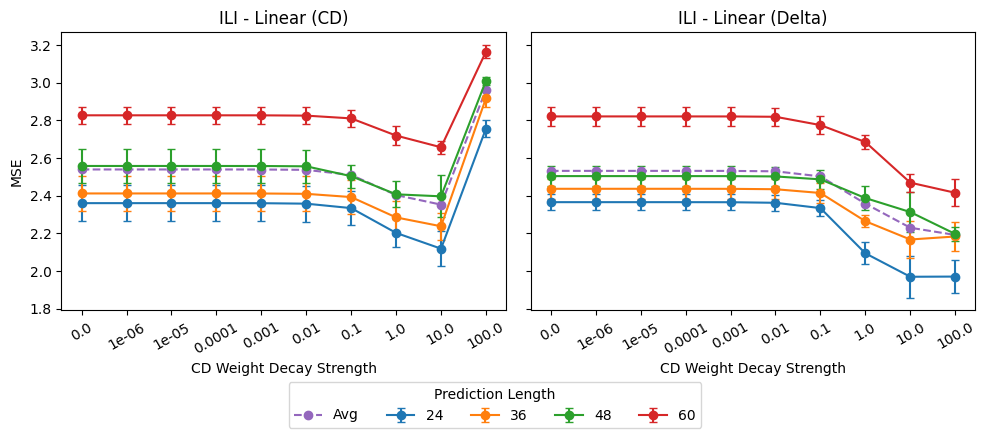

In [82]:
metric = "mse"
data = "ETTh1"
model = "Linear"
channel_handlings = ["CD", "Delta"]
#pred_lens = [96, 192, 336, 720, "Avg"]

for data in ["ILI"]:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    pred_lens = df_avg[(df_avg['data_path'] == data)]['pred_len'].unique().tolist()
    pred_lens = sorted(pred_lens, key=lambda x: float('inf') if x == "Avg" else x)

    #print(pred_lens)

    for ax, channel_handling in zip(axes, channel_handlings):
        for pred_len in pred_lens:
            df_filtered = df_avg[
                (df_avg['data_path'] == data) &
                (df_avg['model'] == model) &
                (df_avg['channel_handling'] == channel_handling) &
                (df_avg['pred_len'] == pred_len)
            ].sort_values(by='cd_weight_decay')

            if not df_filtered.empty:
                if pred_len == "Avg":
                    ax.plot(
                        df_filtered['cd_weight_decay'].astype(str),
                        df_filtered[metric+'_mean'],
                        marker='o',
                        linestyle='--',
                        label=str(pred_len)
                    )
                else:
                    ax.errorbar(
                        df_filtered['cd_weight_decay'].astype(str),
                        df_filtered[metric+'_mean'],
                        yerr=df_filtered[metric+'_std'],
                        marker='o',
                        capsize=3,
                        label=str(pred_len)
                    )

        ax.set_title(f"{data} - Linear ({channel_handling})")
        ax.set_xlabel("CD Weight Decay Strength")
        ax.tick_params(axis='x', rotation=30)
        #ax.grid()

    axes[0].set_ylabel(metric.upper())
    #fig.legend(title="Prediction Length", loc="lower center", ncol=5, bbox_to_anchor=(0.5, -0.1))
    # Get all handles and labels from both axes
    handles_labels = [ax.get_legend_handles_labels() for ax in axes]
    handles, labels = zip(*handles_labels)

    # Flatten and deduplicate
    flat_handles = sum(handles, [])
    flat_labels = sum(labels, [])
    unique = dict(zip(flat_labels, flat_handles))  # removes duplicates by label

    # Shared legend
    fig.legend(
        unique.values(),
        unique.keys(),
        title="Prediction Length",
        loc="lower center",
        ncol=5,
        bbox_to_anchor=(0.5, -0.1)
    )
    plt.tight_layout(rect=[0, 0.01, 1, 1])
    os.makedirs("plots/Thesis", exist_ok=True)
    plt.savefig(f"plots/Thesis/Linear_WeightDecay_{data}.png", bbox_inches='tight', dpi=300)
    plt.show()


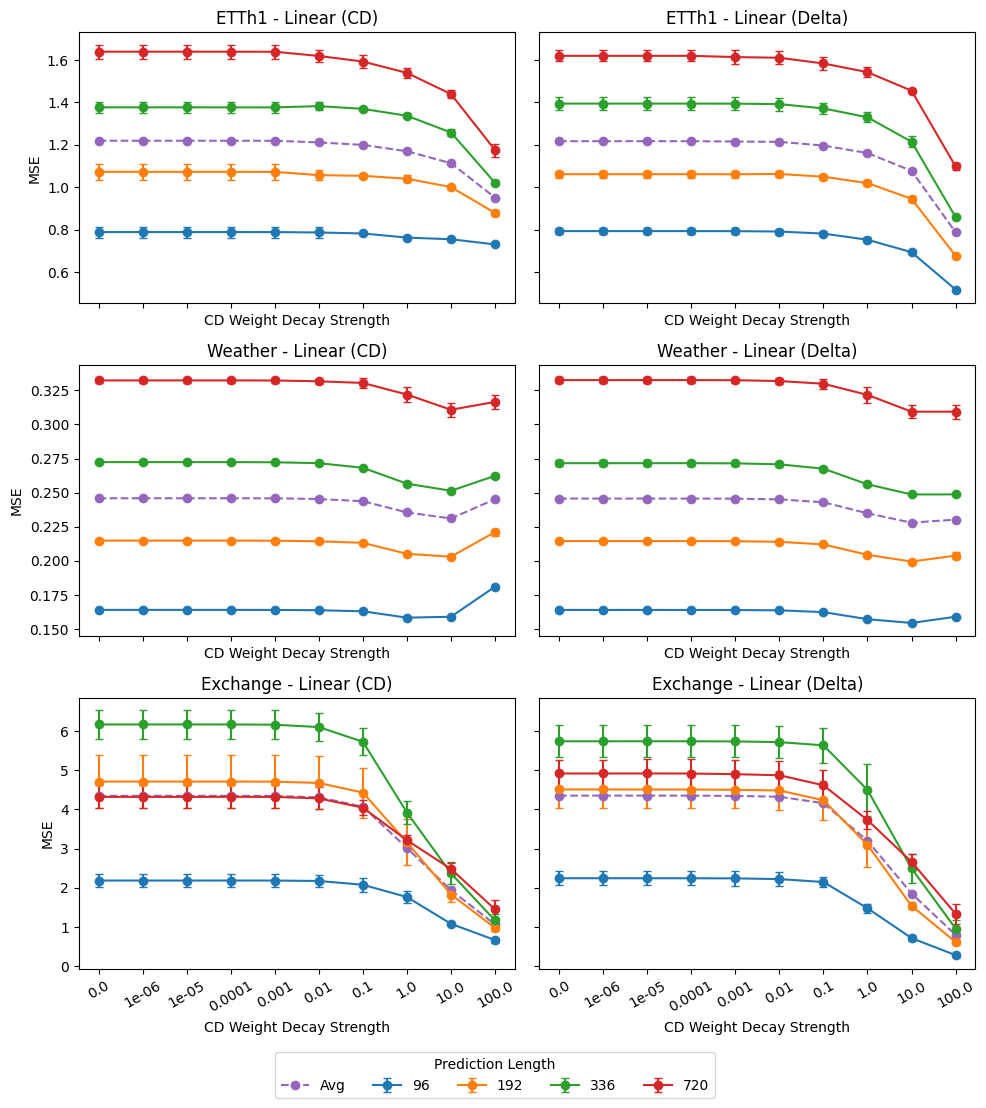

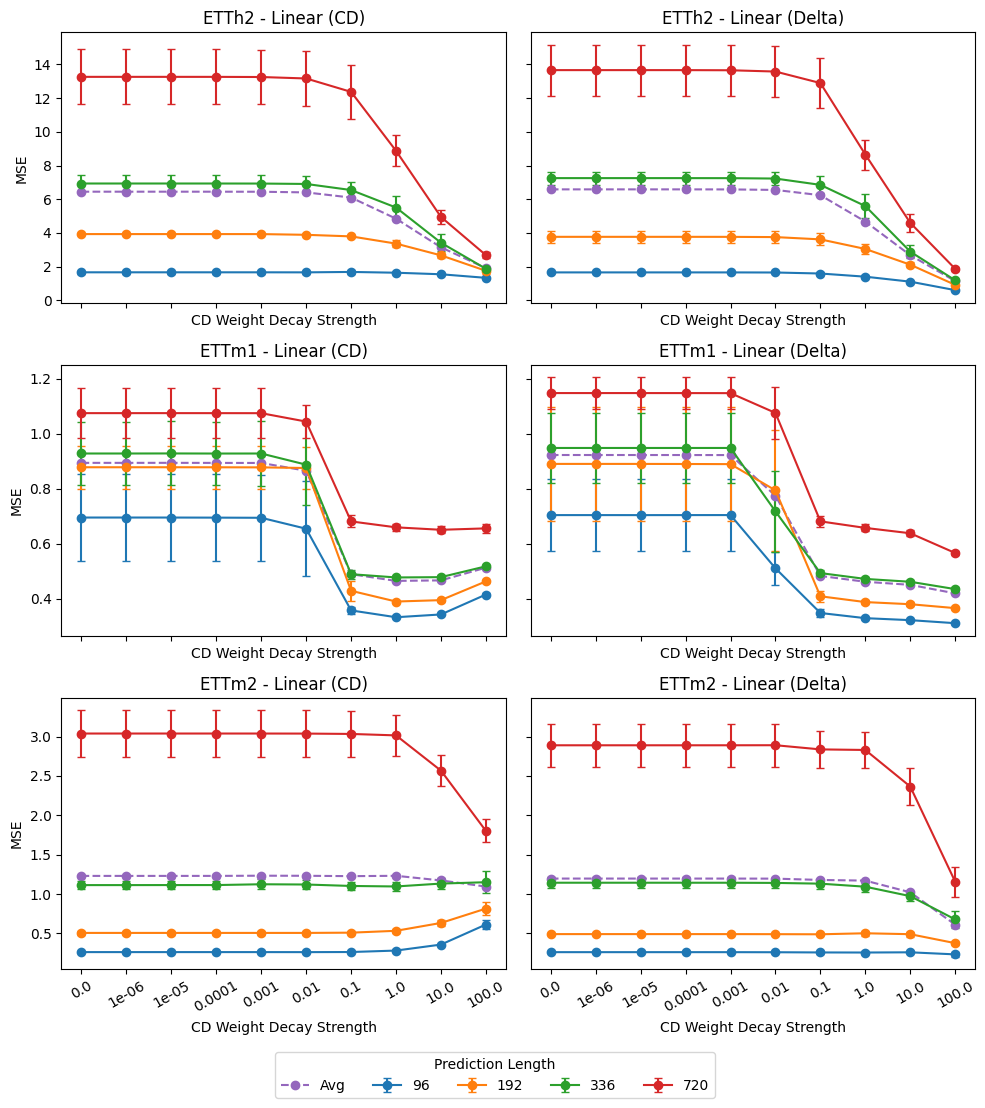

In [83]:
def plot_cd_delta_grid(df, data_list, model="Linear", metric="mse", channel_handlings=["CD", "Delta"]):
    n = len(data_list)
    fig, axes = plt.subplots(n, 2, figsize=(10, 3.7 * n), sharey='row',sharex = True)

    for i, data in enumerate(data_list):
        pred_lens = df[(df['data_path'] == data)]['pred_len'].unique().tolist()
        pred_lens = sorted(pred_lens, key=lambda x: float('inf') if x == "Avg" else x)

        for j, channel_handling in enumerate(channel_handlings):
            ax = axes[i, j] if n > 1 else axes[j]

            for pred_len in pred_lens:
                df_filtered = df[
                    (df['data_path'] == data) &
                    (df['model'] == model) &
                    (df['channel_handling'] == channel_handling) &
                    (df['pred_len'] == pred_len)
                ].sort_values(by='cd_weight_decay')

                if not df_filtered.empty:
                    if pred_len == "Avg":
                        ax.plot(
                            df_filtered['cd_weight_decay'].astype(str),
                            df_filtered[f'{metric}_mean'],
                            marker='o',
                            linestyle='--',
                            label=str(pred_len)
                        )
                    else:
                        ax.errorbar(
                            df_filtered['cd_weight_decay'].astype(str),
                            df_filtered[f'{metric}_mean'],
                            yerr=df_filtered[f'{metric}_std'],
                            marker='o',
                            capsize=3,
                            label=str(pred_len)
                        )

            ax.set_title(f"{data} - {model} ({channel_handling})")
            ax.set_xlabel("CD Weight Decay Strength")
            ax.tick_params(axis='x', rotation=30)
            #ax.grid(alpha=0.3)

            if j == 0:
                ax.set_ylabel(metric.upper())

    # Shared legend
    handles_labels = [ax.get_legend_handles_labels() for ax in axes[0] if hasattr(ax, "get_legend_handles_labels")]
    handles, labels = zip(*handles_labels)
    flat_handles = sum(handles, [])
    flat_labels = sum(labels, [])
    unique = dict(zip(flat_labels, flat_handles))

    fig.legend(
        unique.values(),
        unique.keys(),
        title="Prediction Length",
        loc="lower center",
        ncol=5,
        bbox_to_anchor=(0.5, 0.0)
    )

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    os.makedirs("plots/Thesis", exist_ok=True)
    plt.savefig(f"plots/Thesis/Linear_WeightDecay_{data}.png", bbox_inches='tight', dpi=300)
    plt.show()

plot_cd_delta_grid(df=df_avg, data_list = ["ETTh1", "Weather", "Exchange"]) 
plot_cd_delta_grid(df=df_avg, data_list = ["ETTh2", "ETTm1", "ETTm2"]) 
#plot_cd_delta_grid(df=df_avg, data_list = ["national_illness"]) 


### MSE bar charts - time lag data example

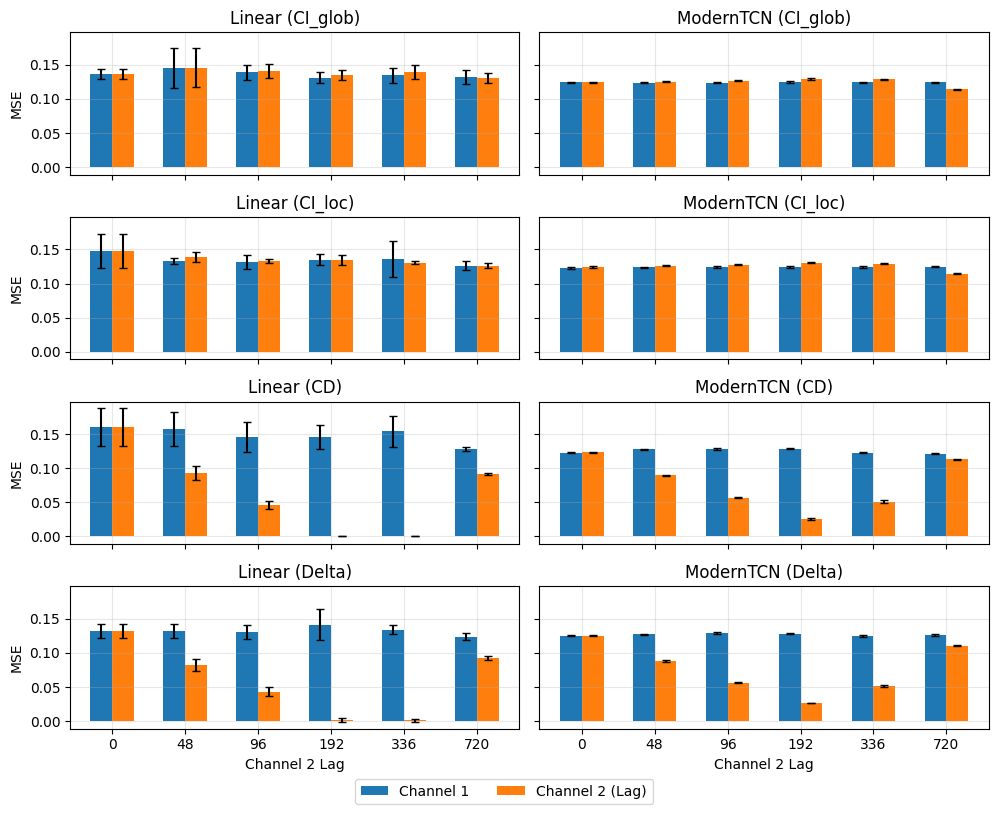

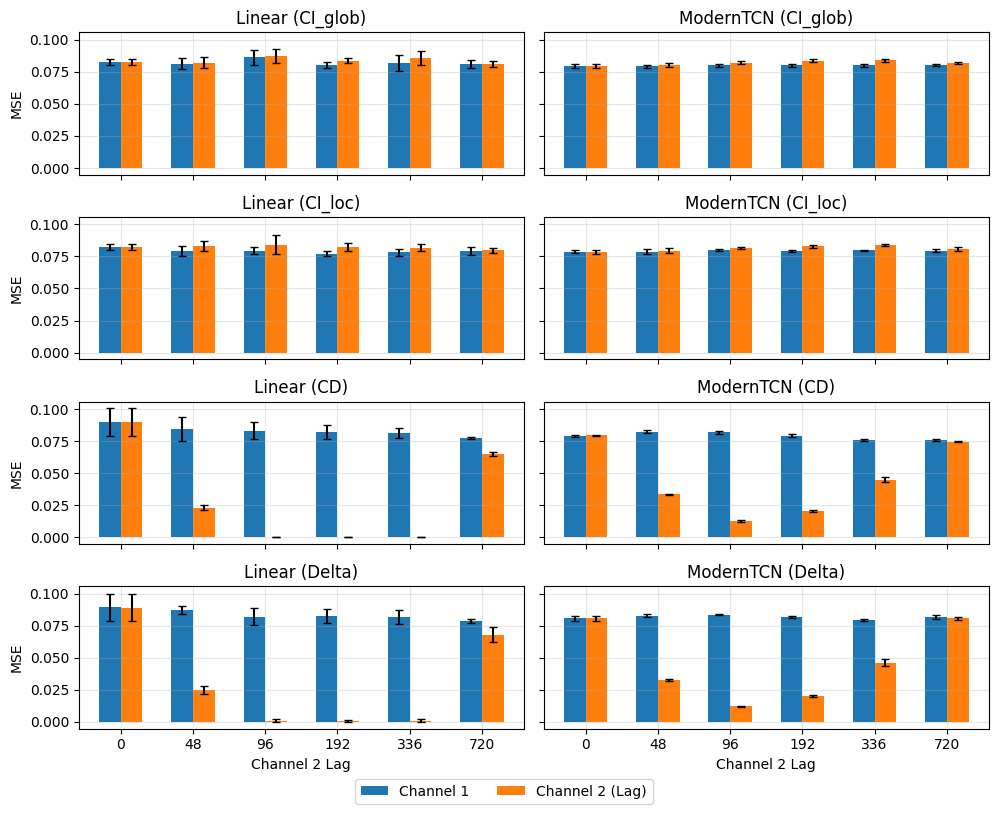

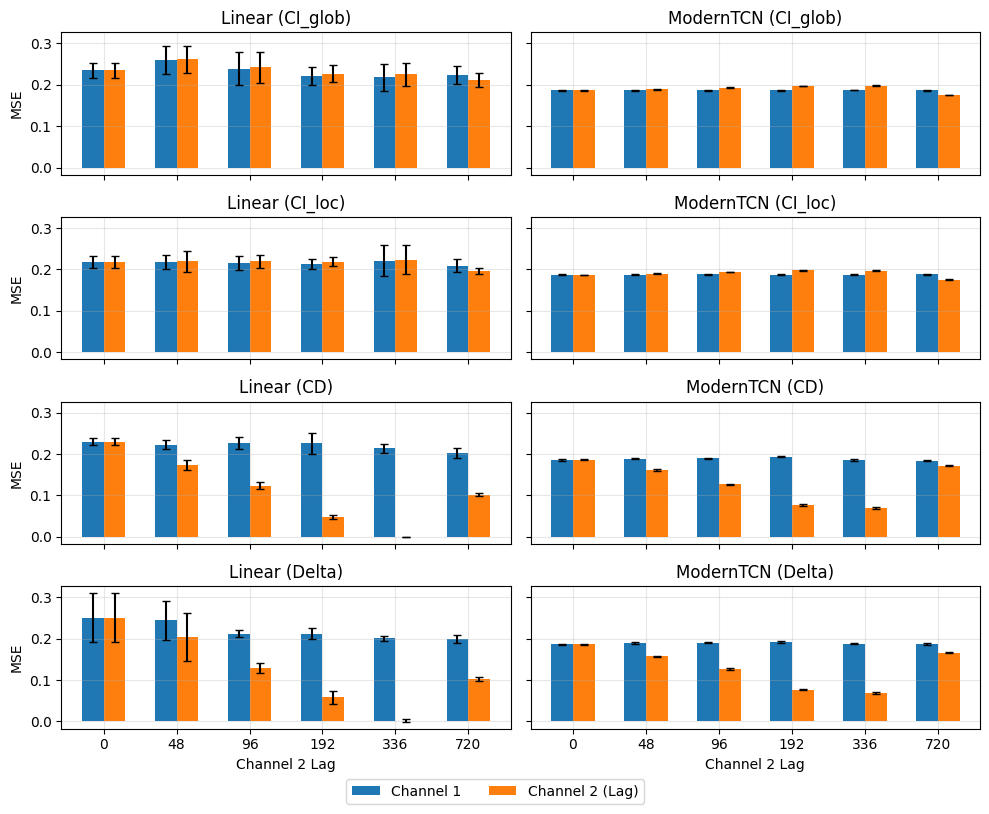

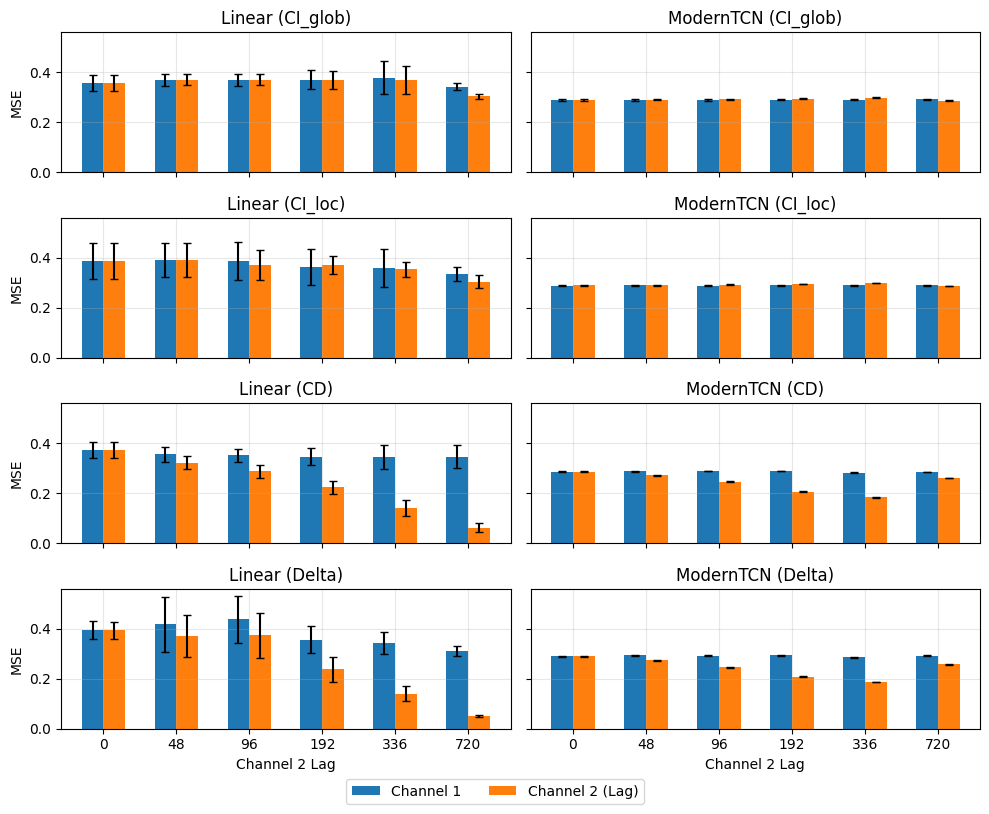

In [84]:

pred_len_list = 192
data_path_list = ["_weather_shower_lag"]
metric = "MSE"

def lag_side_by_side(pred_len=pred_len_list, data_path_list=data_path_list, df_subset=None, models=("Linear","ModernTCN")):
    channel_modes = ["CI_glob", "CI_loc", "CD", "Delta"]
    fig, axs = plt.subplots(len(channel_modes), len(models), figsize=(10, 8), sharey=True, sharex=True)

    # If axs is 2D even for 1x2 or 4x2 cases
    axs = np.atleast_2d(axs)

    for col, model in enumerate(models):
        for row, channel_handling in enumerate(channel_modes):
            ax = axs[row, col]

            # Filter
            df_CI = df_subset[
                (df_subset['model'] == model) &
                (df_subset['channel_handling'] == channel_handling) &
                (df_subset['cd_weight_decay'] == 0.0) &
                (df_subset['data_path'].str.contains("|".join(map(str, data_path_list)))) &
                (df_subset['pred_len'] == pred_len)
            ].copy()

            if df_CI.empty:
                ax.set_title(f'{model} ({channel_handling})')
                ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes)
                ax.grid(alpha=0.3)
                continue

            # Extract lag from data_path
            df_CI['data_lag'] = df_CI['data_path'].str.extract(r'_lag_([0-9]+)')[0].astype(int)
            df_CI = df_CI.sort_values(by='data_lag')

            # Means & STDs (using TEST only per your current code)
            data_test = df_CI["mse_per_channel_list_means"].tolist()
            std_test  = df_CI["mse_per_channel_list_stds"].tolist()

            means = list(map(list, zip(*data_test)))  # transpose to groups
            stds  = list(map(list, zip(*std_test)))

            x_labels = df_CI['data_lag'].astype(str).tolist()
            group_labels = ['Channel 1', 'Channel 2 (Lag)']

            bar_width = 0.3
            x = np.arange(len(x_labels))

            for l, (group_mean, group_std) in enumerate(zip(means, stds)):
                offset = (l - len(means)/2 + 0.5) * bar_width
                ax.bar(
                    x + offset,
                    group_mean,
                    width=bar_width,
                    yerr=group_std,
                    capsize=3,
                    label=group_labels[l]
                )

            ax.set_xticks(x)
            ax.set_xticklabels(x_labels)
            if col == 0:
                ax.set_ylabel(metric)
            if row == len(channel_modes) - 1:
                ax.set_xlabel("Channel 2 Lag")
            ax.set_title(f'{model} ({channel_handling})')
            ax.grid(alpha=0.3)

    # Shared legend
    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.02))

    plt.tight_layout(rect=[0, 0.01, 1, 1])  # leave space for legend
    os.makedirs("plots/Thesis", exist_ok=True)
    outpath = f"plots/Thesis/Lag_{models[0]}_vs_{models[1]}_Pred_{pred_len}.png"
    plt.savefig(outpath, bbox_inches='tight', dpi=300)
    plt.show()

# Example usage
lag_side_by_side(pred_len=192, data_path_list=data_path_list, df_subset=df_avg, models=("Linear","ModernTCN"))

lag_side_by_side(pred_len=96, data_path_list=data_path_list, df_subset=df_avg, models=("Linear","ModernTCN"))
lag_side_by_side(pred_len=336, data_path_list=data_path_list, df_subset=df_avg, models=("Linear","ModernTCN"))
lag_side_by_side(pred_len=720, data_path_list=data_path_list, df_subset=df_avg, models=("Linear","ModernTCN"))


In [85]:
"""
# Only keep Linear CD / Delta for weight decay 1
df_avg = df_avg[~(
    (df_avg["model"] == "Linear") &
    (df_avg["cd_weight_decay"] != 1) &
    (df_avg["channel_handling"].isin(["CD", "Delta"]))
)]
"""

group_100 = {"ETTh1", "ETTh2", "Exchange"}
group_10  = {"ETTm1", "ETTm2", "Weather", "ILI"}

cond_target = (
    (df_avg["model"] == "Linear") &
    (df_avg["channel_handling"].isin(["CD", "Delta"]))
)

keep_decay = (
    (df_avg["data_path"].isin(group_100) & (df_avg["cd_weight_decay"] == 100)) |
    (df_avg["data_path"].isin(group_10)  & (df_avg["cd_weight_decay"] == 10))
)

# Keep everything outside the target subset, and within the target subset keep only matching decays
mask = (~cond_target) | (cond_target & keep_decay)
df_avg = df_avg[mask].copy()

#display(df_avg)



### MSE bar charts - benchmark datasets

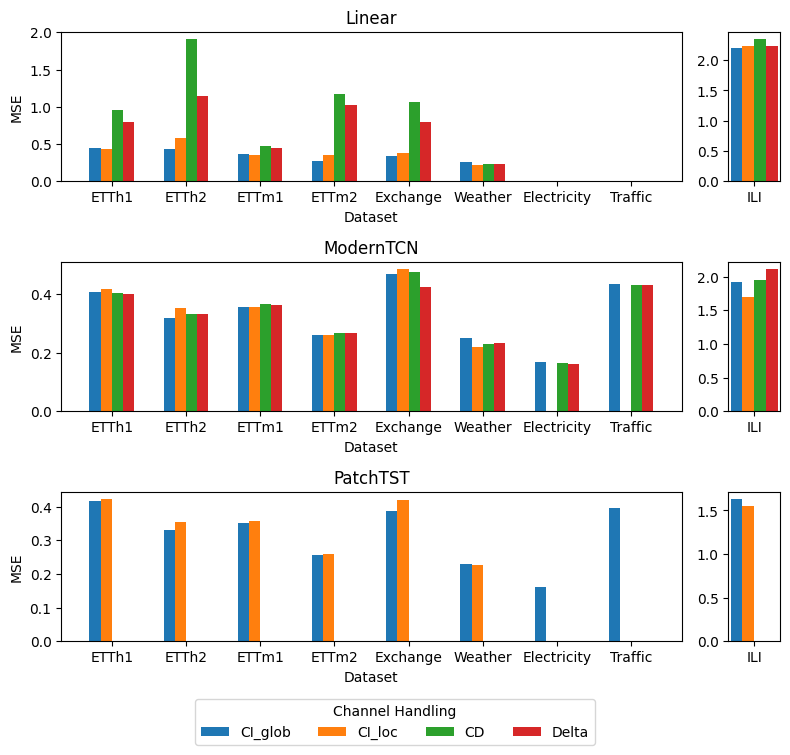

In [86]:
import os
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
data_path_list = ["ETTh1", "ETTh2", "ETTm1", "ETTm2", "Exchange", "Weather"]
model_list = ["Linear", "ModernTCN", "PatchTST"]
pred_len = 96

# Map left-column pred_len -> ILI pred_len
ILI_PRED_MAP = {96: 24, 192: 36, 336: 48, 720: 60}

def map_ili_pred_len(pl):
    if pl == "Avg":
        return "Avg"
    try:
        return ILI_PRED_MAP[int(pl)]
    except (ValueError, KeyError):
        return pl

def plot_overview_two_cols(pred_len=pred_len, model_list=model_list, data_path_list=data_path_list, ili_dataset="ILI"):
    n = len(model_list)
    fig, axes = plt.subplots(n, 2, figsize=(8, 2.5 * n), gridspec_kw={'width_ratios': [12, 1]})

    # Share x-axis per column
    for col in range(2):
        for row in range(1, n):
            axes[row, col].sharex(axes[0, col])

    # Shared legend collections
    all_handles, all_labels = [], []

    channel_handlings = ["CI_glob", "CI_loc", "CD", "Delta"]
    bar_width = 0.15

    # Subtle error-bar style
    eb_style = dict(
        elinewidth=1,
        capsize=2,       # set 0 to remove caps entirely
        capthick=0.8,
        #ecolor="0.7",
        ecolor="black",
        alpha=0.7,
        zorder=3
    )

    def plot_panel(ax, df_plot, datasets, model, panel_label):
        if df_plot.empty:
            ax.set_title(f"{model} — {panel_label} (no data)")
            ax.axis("off")
            return

        x = np.arange(len(datasets))
        for i, ch in enumerate(channel_handlings):
            df_ch = df_plot[df_plot["channel_handling"] == ch]

            y_vals, y_errs = [], []
            for dp in datasets:
                row = df_ch[df_ch["data_path"] == dp]
                if not row.empty:
                    y_vals.append(row["mse_mean"].values[0])
                    y_errs.append(0 if pred_len == "Avg" else row["mse_std"].values[0])
                else:
                    y_vals.append(np.nan)
                    y_errs.append(0)

            offset = (i - len(channel_handlings) / 2) * bar_width + bar_width / 2
            bars = ax.bar(
                x + offset,
                y_vals,
                width=bar_width,
                yerr=None if pred_len == "Avg" else y_errs,
                error_kw=None if pred_len == "Avg" else eb_style,
                capsize=0 if pred_len == "Avg" else 0,  # keep caps controlled by error_kw
                edgecolor="none"  # optional: avoids thick edges around bars
            )
            # collect one handle per channel
            all_handles.append(bars[0])
            all_labels.append(ch)

        ax.set_xticks(x)
        ax.set_xticklabels(datasets, rotation=0)
        if panel_label != "ILI only":
            ax.set_title(f"{model}")
            ax.set_ylabel("MSE")
            ax.set_xlabel("Dataset")
        #ax.grid(alpha=0.3)

    for idx, model in enumerate(model_list):
        # Left: selected datasets
        df_left = df_avg[
            (df_avg["model"] == model) &
            (df_avg["pred_len"] == pred_len) &
            (df_avg["data_path"].isin(data_path_list))
        ].copy()
        plot_panel(axes[idx, 0], df_left, data_path_list, model, "selected")

        # Right: ILI only (mapped pred_len)
        ili_len = map_ili_pred_len(pred_len)
        df_right = df_avg[
            (df_avg["model"] == model) &
            (df_avg["pred_len"] == ili_len) &
            (df_avg["data_path"] == ili_dataset)
        ].copy()
        plot_panel(axes[idx, 1], df_right, [ili_dataset], model, "ILI only")

    # Shared legend (deduplicated)
    unique = dict(zip(all_labels, all_handles))
    fig.legend(
        unique.values(),
        unique.keys(),
        title="Channel Handling",
        loc="lower center",
        ncol=4,
        bbox_to_anchor=(0.5, -0.01)
    )

    plt.tight_layout(rect=[0, 0.06, 1, 1])
    os.makedirs("plots/Thesis", exist_ok=True)
    out = f"plots/Thesis/Overview_Pred_{pred_len}.png"
    plt.savefig(out, bbox_inches="tight", dpi=300)
    plt.show()

# Examples
#for pred_len in [96, 192, 336, 720, "Avg"]:
for pred_len in ["Avg"]:
    plot_overview_two_cols(
        pred_len=pred_len,
        model_list=["Linear","ModernTCN","PatchTST"],
        data_path_list=["ETTh1","ETTh2","ETTm1","ETTm2","Exchange","Weather","Electricity","Traffic"]
    )


### Channel-wise MSE plots

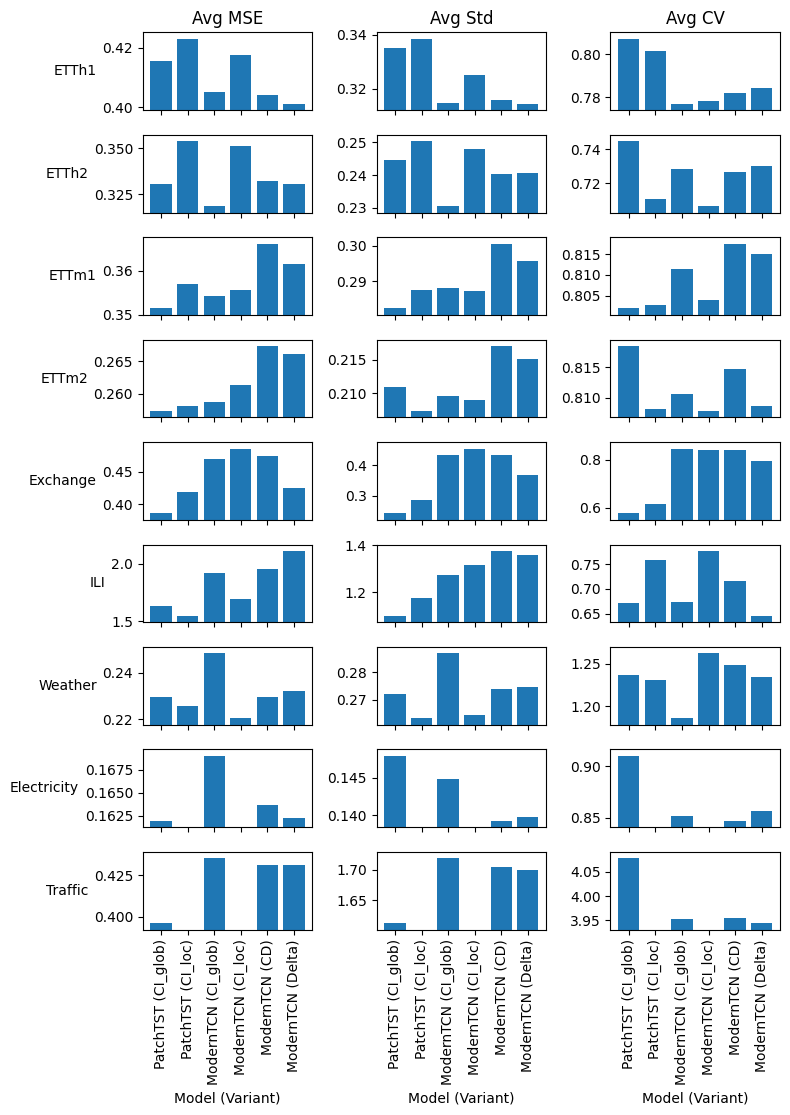

In [87]:


pred_len = 720
pred_len = "Avg"

data_path_list = ["ETTh1", "ETTh2", "ETTm1", "ETTm2", "Exchange", "ILI", "Weather", "Electricity", "Traffic"]

n = len(data_path_list)
fig, axes = plt.subplots(n, 3, figsize=(8, 1.25 * n), sharex=True, squeeze=False)  # n rows, 3 columns

for idx, data_path in enumerate(data_path_list):
    plot_len = map_ili_pred_len(pred_len) if data_path == "ILI" else pred_len

    df_plot = df_avg[
        (df_avg["data_path"] == data_path)
        & (df_avg["model"] != "Linear")
        & (df_avg["pred_len"] == plot_len)
    ].copy()

    ax1, ax2, ax3 = axes[idx]

    if df_plot.empty:
        for ax in [ax1, ax2, ax3]:
            ax.axis("off")
        # put dataset label even if no data
        ax1.set_ylabel(data_path, rotation=0, ha="right", va="center", fontsize=10)
        continue

    x   = df_plot["model_CH"]
    y1  = df_plot["mse_mean"]                  
    y   = df_plot["cw_mse_std_mean"]           
    y2  = df_plot["cw_mse_std_mean_quot_MEAN"] 
    yerr = df_plot["cw_mse_std_mean_quot_STD"]

    # --- Column 1: y1 (MSE Mean) ---
    ax1.bar(x, y1, capsize=4)
    ymin1, ymax1 = float(y1.min()), float(y1.max())
    margin1 = max((ymax1 - ymin1) * 0.1, 1e-6)
    ax1.set_ylim(ymin1 - margin1, ymax1 + margin1)

    # --- Column 2: y (Std Mean) ---
    if pred_len == "Avg":
        ax2.bar(x, y, capsize=4)
        y_min_vals, y_max_vals = y, y
    else:
        ax2.bar(x, y, yerr=yerr, capsize=4)
        y_min_vals, y_max_vals = y - yerr, y + yerr
    ymin, ymax = float(y_min_vals.min()), float(y_max_vals.max())
    margin = max((ymax - ymin) * 0.1, 1e-6)
    ax2.set_ylim(ymin - margin, ymax + margin)

    # --- Column 3: y2 (CV) ---
    ax3.bar(x, y2, capsize=4)
    ymin2, ymax2 = float(y2.min()), float(y2.max())
    margin2 = max((ymax2 - ymin2) * 0.1, 1e-6)
    ax3.set_ylim(ymin2 - margin2, ymax2 + margin2)

    # only show dataset name once per row (on the left side)
    ax1.set_ylabel(data_path, rotation=0, ha="right", va="center", fontsize=10)

    # rotate xticks
    for ax in [ax1, ax2, ax3]:
        ax.tick_params(axis="x", rotation=90)

# Set column titles once at the top
axes[0][0].set_title("Avg MSE")
axes[0][1].set_title("Avg Std")
axes[0][2].set_title("Avg CV")

# Add common x label
for ax in axes[-1]:
    ax.set_xlabel("Model (Variant)")

plt.tight_layout()
os.makedirs("plots/Thesis", exist_ok=True)
plt.savefig(f"plots/Thesis/CW_Std_{pred_len}_3cols.png", bbox_inches="tight", dpi=300)
plt.show()


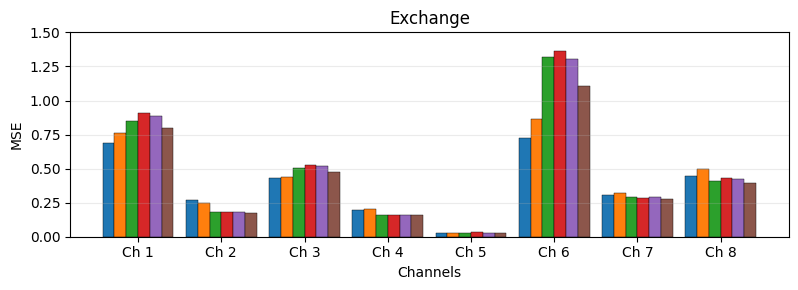

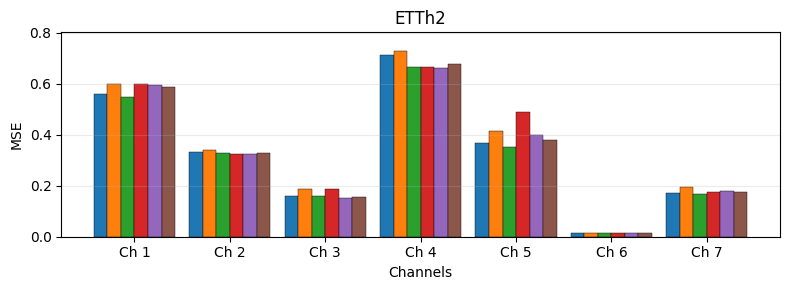

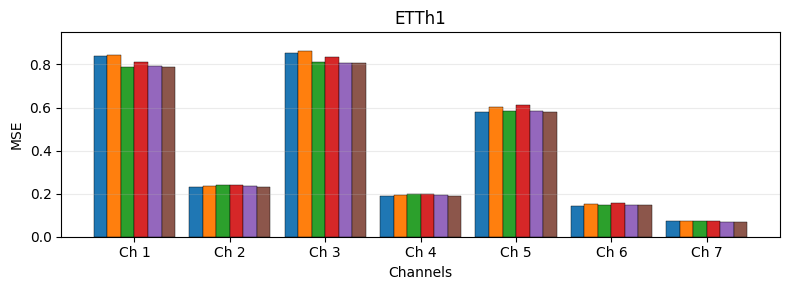

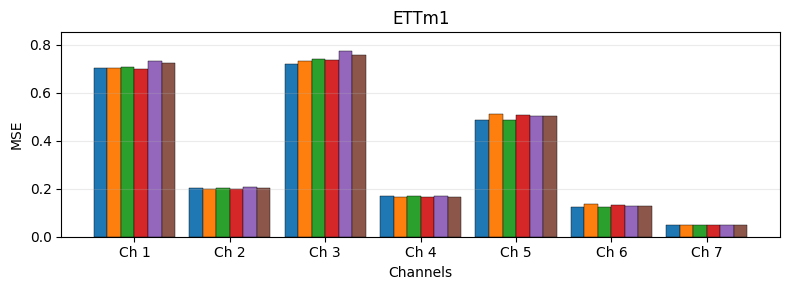

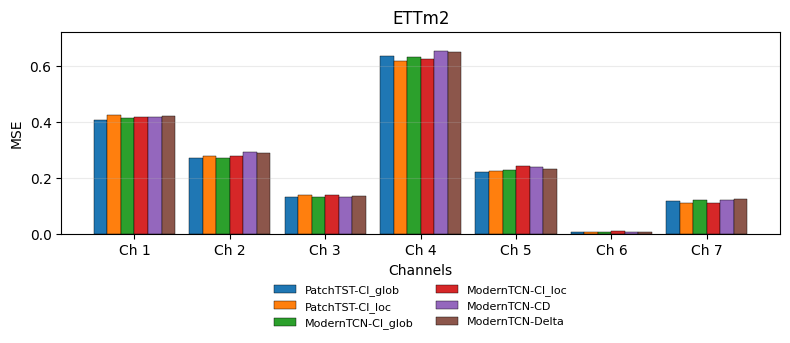

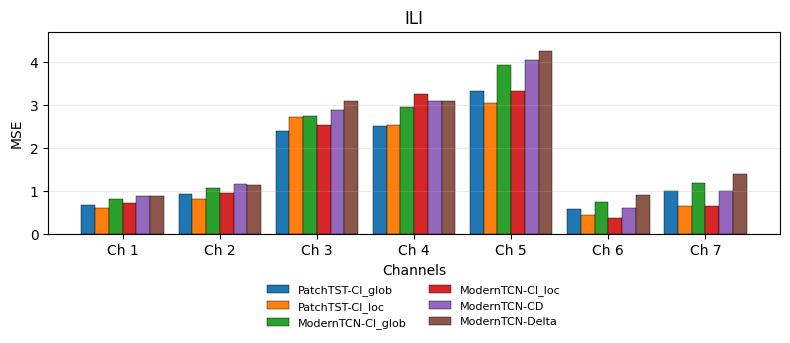

In [88]:

def channel_wise_test_grouped_models(
    df_subset,
    pred_len=24,
    data_path="ILI",
    models=("ModernTCN", "PatchTST"),
    m_type=(("CI_glob", 0), ("CI_loc", 0), ("CD", 0), ("Delta", 0)),
    legend=True,
):
    """
    Plot ONE figure with grouped bars of TEST MSE per channel.
    Each group = a channel; bars within a group = model+channel_handling combinations.
    """

    series_per_method = []
    labels = []

    palette = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
    ]

    for model in models:
        for ch_handle, wd in m_type:
            filt = (
                (df_subset["model"] == model)
                & (df_subset["channel_handling"] == ch_handle)
                & (df_subset["data_path"] == data_path)
                & (df_subset["pred_len"] == pred_len)
            )
            if "cd_weight_decay" in df_subset.columns:
                filt = filt & (df_subset["cd_weight_decay"] == wd)

            df_sel = df_subset.loc[filt].copy()
            if df_sel.empty:
                continue

            test_list = df_sel["mse_per_channel_list_means"].iloc[0]
            test_arr = np.asarray(list(test_list), dtype=float)
            series_per_method.append(test_arr)

            labels.append(f"{model}-{ch_handle}")

            """
            if ch_handle in ("CI_glob", "CI_loc"):
                labels.append(f"{model}-{ch_handle}")
            else:
                labels.append(f"{model}-{ch_handle}(wd={wd})")
            """

    if not series_per_method:
        raise ValueError("No matching rows found for given filters.")

    n_channels_set = {len(arr) for arr in series_per_method}
    if len(n_channels_set) != 1:
        raise ValueError(f"Different channel counts: {n_channels_set}")

    n_methods = len(series_per_method)
    n_channels = list(n_channels_set)[0]

    # ---- Plot ----
    if legend:
        fig, ax = plt.subplots(figsize=(8, 3.7))
    else:  
        fig, ax = plt.subplots(figsize=(8, 3))

    x = np.arange(n_channels)
    total_width = 0.85
    bar_width = total_width / n_methods

    for i, arr in enumerate(series_per_method):
        offsets = x - total_width / 2 + (i + 0.5) * bar_width
        ax.bar(offsets, arr, width=bar_width,
               label=labels[i],
               color=palette[i % len(palette)],
               edgecolor="black", linewidth=0.3)

    ax.set_xticks(x)
    ax.set_xticklabels([f"Ch {i+1}" for i in x])
    ax.set_xlabel("Channels")
    ax.set_ylabel("MSE")
    ax.set_title(f"{data_path}")
    ax.grid(axis="y", alpha=0.25)

    # Legend below the chart
    if legend:
        ax.legend(
            ncols=2,
            frameon=False,
            fontsize=8,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.2)
        )

    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax + (ymax - ymin) * 0.05)

    fig.tight_layout()
    # Save the figure
    os.makedirs("plots/Thesis", exist_ok=True)
    out = f"plots/Thesis/Channel_Wise_MSE_Grouped_{data_path}.png"
    plt.savefig(out, bbox_inches="tight", dpi=300)
    return fig, ax

# Example usage:
for data_path in ["Exchange", "ETTh2", "ETTh1", "ETTm1", "ETTm2", "ILI"]:
    if data_path in ["ETTm2", "ILI"]:
        legend = True
    else:
        legend = False

    fig, ax = channel_wise_test_grouped_models(
        df_subset=df_avg,
        pred_len="Avg",
        data_path=data_path,
        models=("PatchTST", "ModernTCN"),
        legend=legend
    )
    plt.show()


### Tables

In [89]:
### Tables!

metric = "mse"
model = "Linear"

def table(channel_handling_list=["CI_glob", "CI_loc", "CD", "Delta"], df_avg=df_avg, metric=metric, model=model):
    list_pred_len = [96, 192, 336, 720, "Avg"]
    list_data_path = ["ETTh1", "ETTh2", "ETTm1", "ETTm2", "Exchange", "Weather", "Traffic", "Electricity"]
    index_labels = [f"{data_path} - {pred_len}" for data_path in list_data_path for pred_len in list_pred_len]

    list_pred_len = [24, 36, 48, 60, "Avg"]
    list_data_path = ["ILI"]
    index_labels = index_labels + [f"{data_path} - {pred_len}" for data_path in list_data_path for pred_len in list_pred_len]

    # Example: define some columns
    columns = [f"{ch} - {val}" for ch in channel_handling_list for val in ["Mean", "Std"]]

    df_table = pd.DataFrame(index=index_labels, columns=columns)

    for data_path in ["ETTh1", "ETTh2", "ETTm1", "ETTm2", "Exchange", "Weather", "Traffic", "Electricity", "ILI"]:
        if data_path == "ILI":
            list_pred_len = [24, 36, 48, 60, "Avg"]
        else:
            list_pred_len = [96, 192, 336, 720, "Avg"]

        for pred_len in list_pred_len:
            for ch in channel_handling_list:
                
                df_filtered = df_avg[
                    (df_avg['data_path'].str.contains(data_path)) &
                    (df_avg['model'] == model) &
                    (df_avg['pred_len'] == pred_len) &
                    (df_avg['channel_handling'] == ch)
                ]

                if not df_filtered.empty:
                    mse = df_filtered[metric+'_mean'].values[0]
                    mae = df_filtered[metric+'_mean'].values[0]
                    df_table.loc[f"{data_path} - {pred_len}", f"{ch} - Mean"] = round(mse, 3)
                    df_table.loc[f"{data_path} - {pred_len}", f"{ch} - Mean"] = round(mae, 3)

                    if pred_len != "Avg":
                        mse = df_filtered[metric+'_std'].values[0]
                        mae = df_filtered[metric+'_std'].values[0]
                        df_table.loc[f"{data_path} - {pred_len}", f"{ch} - Std"] = round(mse, 3)
                        df_table.loc[f"{data_path} - {pred_len}", f"{ch} - Std"] = round(mae, 3)

    df_table.to_csv(f"plots/Thesis/table_{model}_{metric}.csv", index=True)

    return df_table

#display(table())

for metric in ["mse", "mae"]:
    table(channel_handling_list=["CI_glob", "CI_loc", "CD", "Delta"], metric=metric, model="Linear")
    table(channel_handling_list=["CI_glob", "CI_loc", "CD", "Delta"], metric=metric, model="ModernTCN")
    table(channel_handling_list=["CI_glob", "CI_loc"], metric=metric, model="PatchTST")

### Predictions

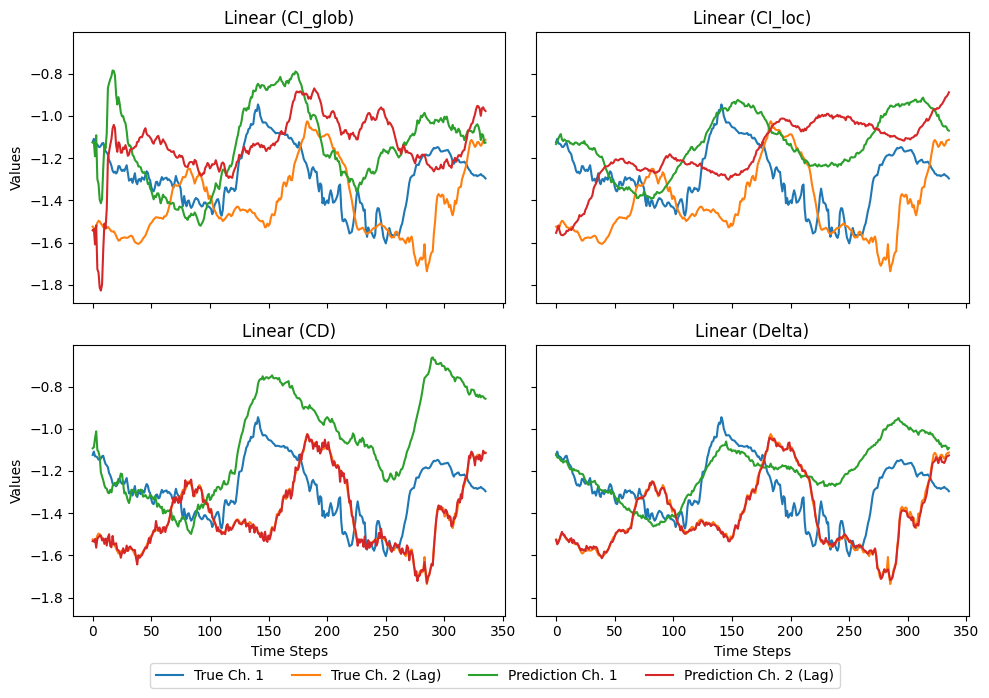

In [90]:

def load_last_336(csv_path):
    with open(csv_path) as f:
        total_rows = sum(1 for _ in f) - 1  # subtract header
    skip = max(total_rows - 336, 0)
    return pd.read_csv(csv_path, skiprows=range(1, skip + 1))

# === Define paths for all 4 models ===

paths = {
    "CI_glob": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCI_glob_cdwd0.0_Exp_0",
    "CI_loc": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCI_loc_cdwd0.0_Exp_0",
    "CD": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCD_cdwd0.0_Exp_0",
    "Delta": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chDelta_cdwd0.0_Exp_0",
}

# === Setup subplots (2 rows, 2 cols) ===
fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()  # flatten for easy indexing

for ax, label in zip(axes, paths.keys()):
    df_true = pd.read_pickle(f"data/Lag_336_Linear_{label}_True.pkl")
    df_pred = pd.read_pickle(f"data/Lag_336_Linear_{label}_Pred.pkl")

    ax.plot(df_true[f"feature_{1 - 1}"], label=f"True Ch. 1")
    ax.plot(df_true[f"feature_{2 - 1}"], label=f"True Ch. 2 (Lag)")

    ax.plot(df_pred[f"feature_{1 - 1}"], label=f"Prediction Ch. 1")
    ax.plot(df_pred[f"feature_{2 - 1}"], label=f"Prediction Ch. 2 (Lag)")
    
    ax.set_title(f"Linear ({label})")


# Axis labels (shared where possible)
for ax in axes[:2]:
    ax.set_xlabel("")
for ax in axes[2:]:
    ax.set_xlabel("Time Steps")

for i in [0, 2]:
    axes[i].set_ylabel("Values")

# Shared Legend below all plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.00))

plt.tight_layout(rect=[0, 0.03, 1, 1])  # Leave space for legend
os.makedirs("plots/Thesis", exist_ok=True)
plt.savefig("plots/Thesis/Lag_336_Linear_336_predictions.png", bbox_inches='tight', dpi=300)
plt.show()


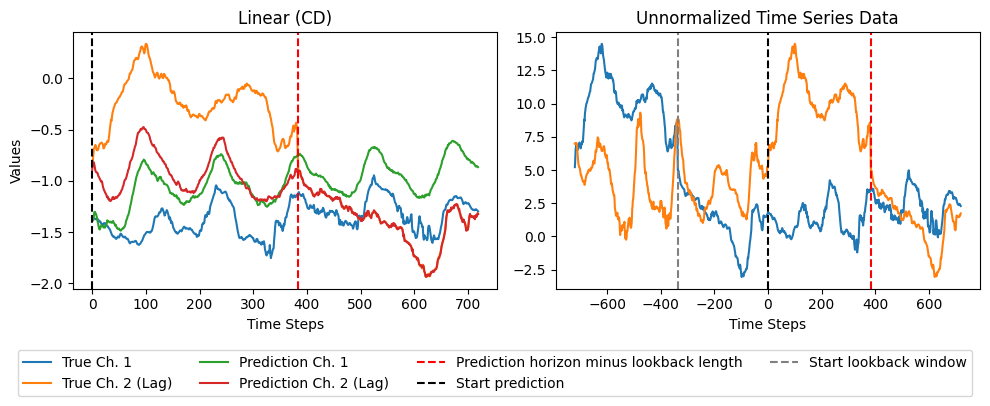

In [91]:
# --- Model prediction data ---

df_true = pd.read_pickle(f"data/Lag_720_Linear_{label}_True.pkl")
df_pred = pd.read_pickle(f"data/Lag_720_Linear_{label}_Pred.pkl")

# --- Raw data ---
raw_df = pd.read_pickle(f"data/Lag_720_Timeseries.pkl")

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

ch_label_pred = f"pred_ch.{1}"
ch_label_true = f"true_ch.{1}"




axes[0].plot(df_true[f"feature_{1-1}"], label=f"True Ch. 1")#, color=colors[ch_label_true])
axes[0].plot(df_true[f"feature_{2-1}"], label=f"True Ch. 2 (Lag)")#, color=colors[ch_label_true])

axes[0].plot(df_pred[f"feature_{1-1}"], label=f"Prediction Ch. 1")#, color=colors[ch_label_pred])
axes[0].plot(df_pred[f"feature_{2-1}"], label=f"Prediction Ch. 2 (Lag)")#, color=colors[ch_label_pred])


axes[0].axvline(x=(1440-336+1-721), color='red', linestyle='--', label='Prediction horizon minus lookback length')
axes[0].axvline(x=0, color='black', linestyle='--', label='Start prediction')
axes[0].set_title("Linear (CD)")
axes[0].set_xlabel("Time Steps")
axes[0].set_ylabel("Values")
#axes[0].grid()


# --- Subplot 2: Raw Data with Lookback Windows ---
axes[1].plot(raw_df["T_degC"], label=None)#, color=colors["true_ch.1"])
axes[1].plot(raw_df["T_degC_LAG"], label=None)#, color=colors["true_ch.2"])
axes[1].axvline(x=0, color='black', linestyle='--', label='Start prediction')
axes[1].axvline(x=(720-336+1-721), color='grey', linestyle='--', label='Start lookback window')
axes[1].axvline(x=(1440-336+1-721), color='red', linestyle='--', label='Prediction horizon minus lookback length')
axes[1].set_title("Unnormalized Time Series Data")
axes[1].set_xlabel("Time Steps")
#axes[1].grid()



# --- Shared Legend (no duplicates) ---
# Only take one copy of each label
seen = set()
combined_handles_labels = []

for ax in axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        if l not in seen:
            combined_handles_labels.append((h, l))
            seen.add(l)

handles, labels = zip(*combined_handles_labels)
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0.12, 1, 1])
os.makedirs("plots/Thesis", exist_ok=True)
plt.savefig("plots/Thesis/Lag_720_Linear_720_predictions.png", bbox_inches='tight', dpi=300)
plt.show()

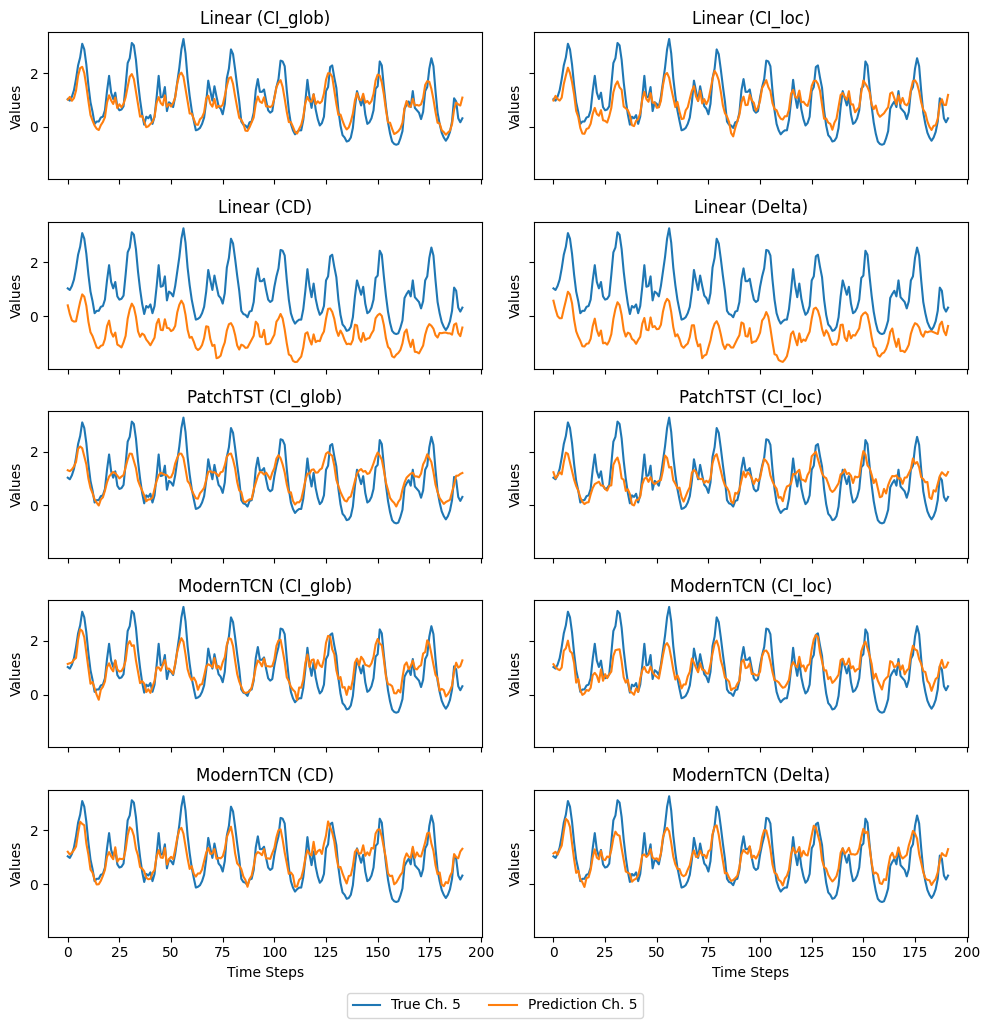

In [92]:

# === Settings ===
channel = 5
labels = ["Linear (CI_glob)", "Linear (CI_loc)", "Linear (CD)", "Linear (Delta)", "PatchTST (CI_glob)", "PatchTST (CI_loc)", "ModernTCN (CI_glob)", "ModernTCN (CI_loc)", "ModernTCN (CD)", "ModernTCN (Delta)"]

# === Plotting setup ===
fig, axes = plt.subplots(5, 2, figsize=(10, 10), sharex=True, sharey=True)
axes = axes.flatten()

count = 0  # reset here

for ax, label in zip(axes, labels):
    df_true = pd.read_pickle(f"data/ETTh1_192_{label}_True.pkl")
    df_pred = pd.read_pickle(f"data/ETTh1_192_{label}_Pred.pkl")

    ax.plot(df_true[f"feature_{channel - 1}"], label=f"True Ch. {channel}")
    ax.plot(df_pred[f"feature_{channel - 1}"], label=f"Prediction Ch. {channel}")
    
    ax.set_title(label)
    ax.set_ylabel("Values")
    if label in ["ModernTCN (CD)", "ModernTCN (Delta)"]:
        ax.set_xlabel("Time Steps")
    count += 1

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.03))

plt.tight_layout(rect=[0, 0.00, 1, 1])
os.makedirs("plots/Thesis", exist_ok=True)
plt.savefig(f"plots/Thesis/ETTh1_ch-{channel}_multi_models_192.png", bbox_inches='tight', dpi=300)
plt.show()